In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode
import math
from sklearn.metrics import mean_squared_error
from math import sqrt
import keras 
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from keras import regularizers
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Using TensorFlow backend.


In [2]:
data_file_train = os.path.join('Data','Train_BigMart.csv')
data_file_test = os.path.join('Data','Test_BigMart.csv')
print(data_file_train)
print(data_file_test)
df_train = pd.read_csv(data_file_train)
df_test = pd.read_csv(data_file_test)
df_train.head()
df_all = pd.concat([df_train,df_test], ignore_index=True)

Data/Train_BigMart.csv
Data/Test_BigMart.csv


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
print(df_train.shape)

(8523, 12)


In [6]:
df_train.shape,df_test.shape

((8523, 12), (5681, 11))

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
#Filling data

In [11]:
df_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
categorical_columns = [x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(df_train[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variabl

In [13]:
categorical_columns = [x for x in df_test.dtypes.index if df_test.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(df_test[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    624
OUT013    621
OUT049    620
OUT035    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variable Outlet_Size
Me

In [14]:
df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
df_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [15]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [16]:
df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [17]:
item_av_weight = df_all.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [18]:
null_mask_weight = df_train['Item_Weight'].isnull()
df_train.loc[null_mask_weight, 'Item_Weight'] = df_train.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])

In [19]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
null_mask_weight = df_test['Item_Weight'].isnull()
df_test.loc[null_mask_weight, 'Item_Weight'] = df_test.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])

In [21]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [22]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [23]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna('unknown')
outlet_type_mode_size = df_train.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

/home/adam/.local/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [24]:
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna('unknown')
outlet_type_mode_size = df_test.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Text(0.5, 1.0, '')

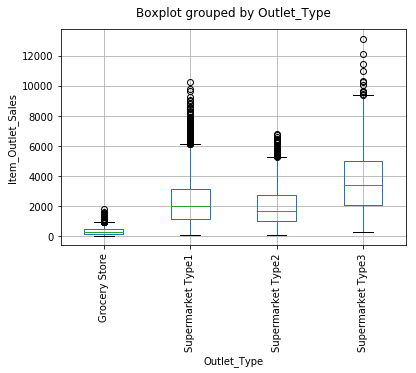

In [25]:
ax = df_train.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

In [26]:
df_train['Outlet_Size'].replace('unknown', 'Small', inplace=True)
df_test['Outlet_Size'].replace('unknown', 'Small', inplace=True)

In [27]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [29]:
#Data visualization

Text(0.5, 1.0, '')

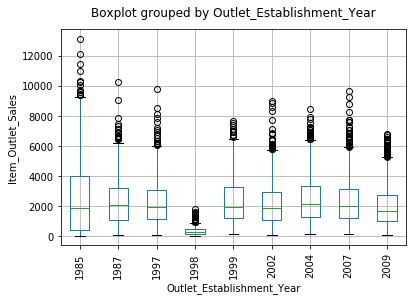

In [30]:
ax = df_train.boxplot(column='Item_Outlet_Sales', by='Outlet_Establishment_Year', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

Text(0.5, 1.0, '')

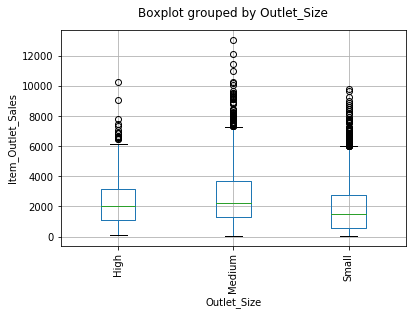

In [31]:
ax = df_train.boxplot(column='Item_Outlet_Sales', by='Outlet_Size', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

Text(0.5, 1.0, '')

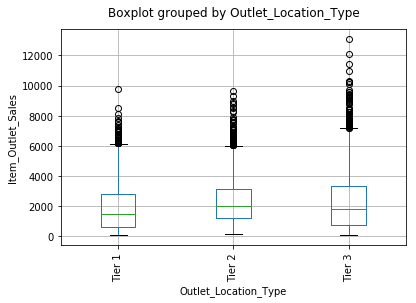

In [32]:
ax = df_train.boxplot(column='Item_Outlet_Sales', by='Outlet_Location_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

Text(0.5, 1.0, '')

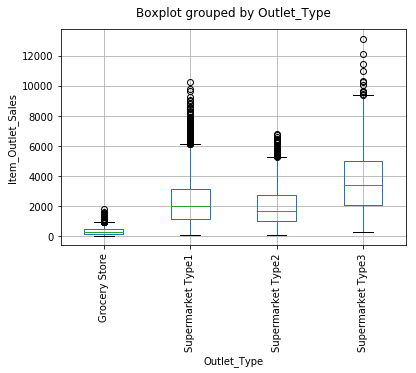

In [33]:
ax = df_train.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


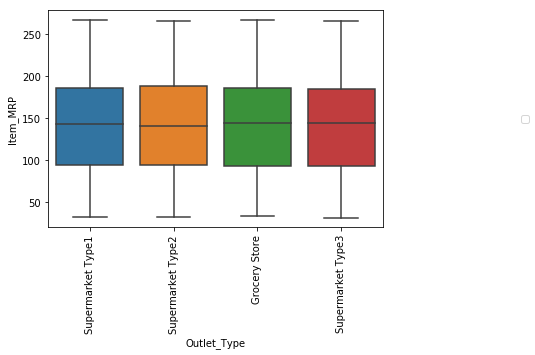

In [34]:
ax = sns.boxplot(data=df_train, x='Outlet_Type', y='Item_MRP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


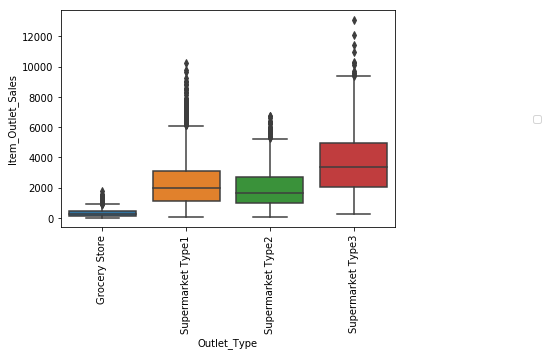

In [35]:
ax = sns.boxplot(data=df_train, x='Outlet_Type', y='Item_Outlet_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

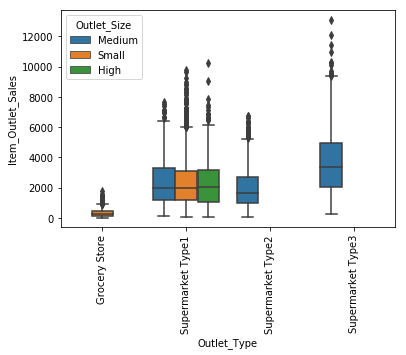

In [36]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=df_train, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

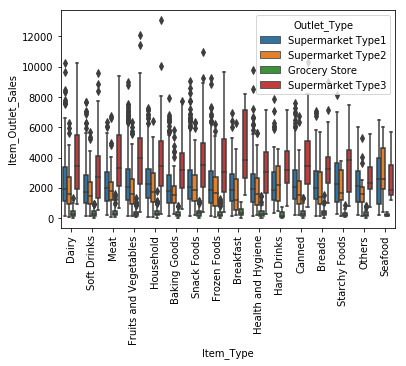

In [37]:
ax = sns.boxplot(data=df_train, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(0, 0, 'OUT049'),
 Text(0, 0, 'OUT018'),
 Text(0, 0, 'OUT010'),
 Text(0, 0, 'OUT013'),
 Text(0, 0, 'OUT027'),
 Text(0, 0, 'OUT045'),
 Text(0, 0, 'OUT017'),
 Text(0, 0, 'OUT046'),
 Text(0, 0, 'OUT035'),
 Text(0, 0, 'OUT019')]

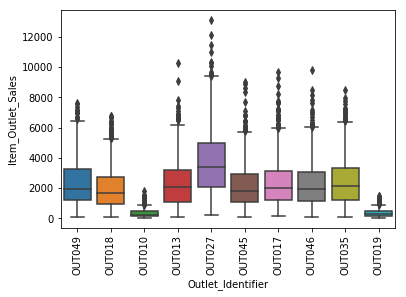

In [38]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=df_train, x='Outlet_Identifier', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

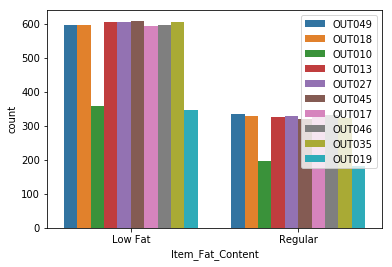

In [39]:
sns.countplot(x = 'Item_Fat_Content', hue = 'Outlet_Identifier', data=df_train).legend(loc=1)

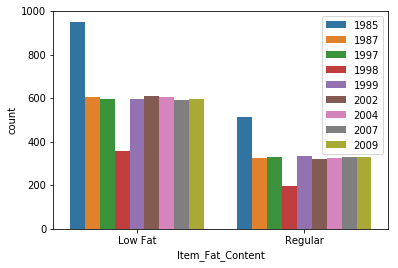

In [40]:
sns.countplot(x = 'Item_Fat_Content', hue = 'Outlet_Establishment_Year', data=df_train).legend(loc=1)

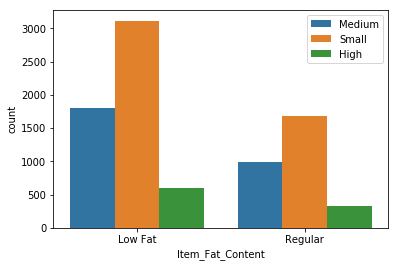

In [41]:
sns.countplot(x = 'Item_Fat_Content', hue = 'Outlet_Size', data=df_train).legend(loc=1)

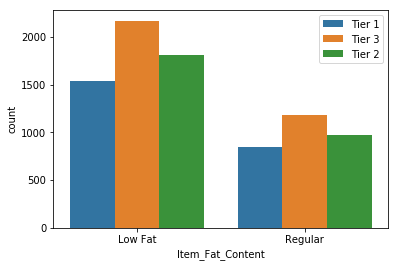

In [42]:
sns.countplot(x = 'Item_Fat_Content', hue = 'Outlet_Location_Type', data=df_train).legend(loc=1)

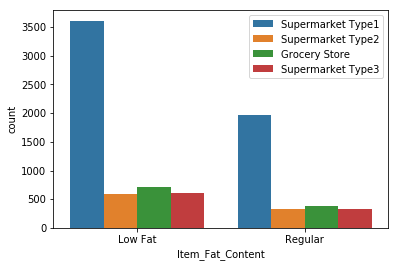

In [43]:
sns.countplot(x = 'Item_Fat_Content', hue = 'Outlet_Type', data=df_train).legend(loc=1)

In [44]:
#Feature

In [45]:
df_train['Item_Category'] = df_train['Item_Identifier'].astype(str).str[:2]
df_test['Item_Category'] = df_test['Item_Identifier'].astype(str).str[:2]
df_train['Item_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [46]:
df_train['Item_Category'] = df_train['Item_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
df_test['Item_Category'] = df_test['Item_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

In [47]:
df_train['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: Item_Category, dtype: int64

In [48]:
df_train.loc[df_train['Item_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_test.loc[df_test['Item_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

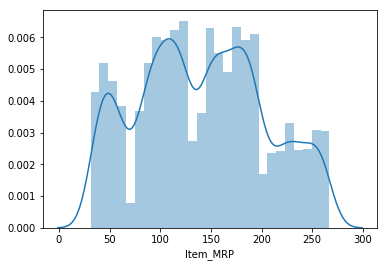

In [49]:
ax = sns.distplot(df_train['Item_MRP'])

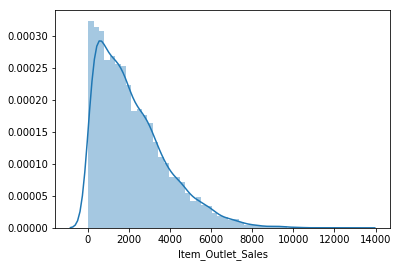

In [50]:
ax = sns.distplot(df_train['Item_Outlet_Sales'])

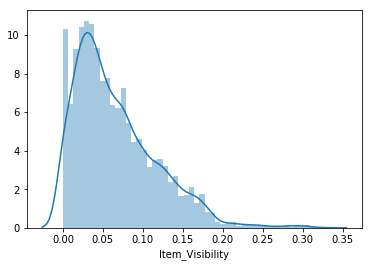

In [51]:
ax = sns.distplot(df_train['Item_Visibility'])

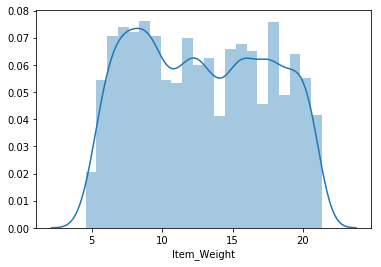

In [52]:
ax = sns.distplot(df_train['Item_Weight'])

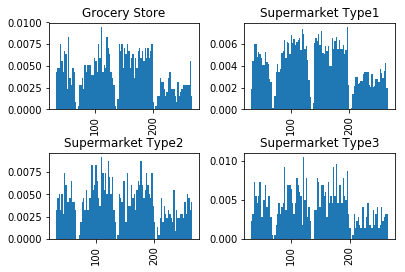

In [53]:
ax = df_train.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

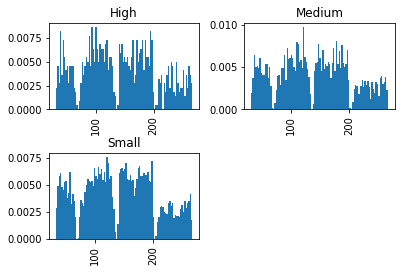

In [54]:
ax = df_train.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

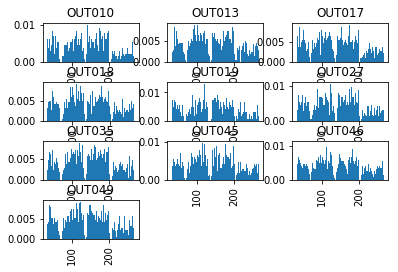

In [55]:
ax = df_train.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)

In [56]:
#Analysis of Categorical Data

In [57]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Category'],
      dtype='object')

In [58]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Category                 object
dtype: object

In [59]:
categorical_columns = [x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(df_train[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variable Outlet_Size
Small    

In [60]:
df_test_Item_Identifier=df_train['Item_Identifier']
df_train = df_train.drop('Item_Identifier', axis=1)
df_test = df_test.drop('Item_Identifier', axis=1)

In [61]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Category'],
      dtype='object')

In [62]:
df_train['Outlet_Establishment_Year'] = df_train['Outlet_Establishment_Year'].apply(str)

In [63]:
df_train_nn = pd.get_dummies(df_train)

In [64]:
X1 = df_train.drop('Item_Outlet_Sales', 1)
XZ1 = df_test
y = df_train['Item_Outlet_Sales']

In [65]:
X1_nn=df_train_nn.drop('Item_Outlet_Sales', 1)
y_nn = df_train_nn['Item_Outlet_Sales']

In [66]:
X1_nn=normalize(X1_nn,axis=0)

In [67]:
for dataset in y:
    y_nn= ((y_nn-y_nn.min())/(y_nn.max()-y_nn.min()))

In [68]:
y_nn.head(10)

0    0.283587
1    0.031419
2    0.158115
3    0.053555
4    0.073651
5    0.040090
6    0.023768
7    0.305621
8    0.079925
9    0.358309
Name: Item_Outlet_Sales, dtype: float64

In [69]:
y.max()

13086.9648

In [70]:
y.min()

33.29

In [71]:
y_transform=y*10000
y_transform = y_transform.astype(int)

In [72]:
y_transform.head(10)

0    37351380
1     4434228
2    20972700
3     7323800
4     9947052
5     5566088
6     3435528
7    40227636
8    10765986
9    47105350
Name: Item_Outlet_Sales, dtype: int64

In [73]:
for dataset in y:
    y_scaled= ((y_transform-y_transform.min())/(y_transform.max()-y_transform.min()))


In [74]:
X1.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category'],
      dtype='object')

In [75]:
X1 = pd.get_dummies(X1)
XZ1 = pd.get_dummies(XZ1)

In [76]:
X1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-Consumable
0,9.30,0.016047,249.8092,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [77]:
X1.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Non-Edible          uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Identifier_OUT010             uint8
Outlet_Iden

In [78]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 54 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Item_Fat_Content_Low Fat           8523 non-null uint8
Item_Fat_Content_Non-Edible        8523 non-null uint8
Item_Fat_Content_Regular           8523 non-null uint8
Item_Type_Baking Goods             8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_Type_Fruits and Vegetables    8523 non-null uint8
Item_Type_Hard Drinks              8523 non-null uint8
Item_Type_Health and Hygiene       8523 non-null uint8
Item_Type_Household                8523 non-null uint8
Item_Ty

In [79]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y_transform, test_size = 0.2,random_state = 0)

In [80]:
#Logistic Regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
pred_cv1 = model1.predict(X_test1)
rmse1 = sqrt(mean_squared_error(y_test1, pred_cv1)/100000000)
rmse1

1132.0443790746804

In [81]:
#K-NN model
model2 = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model2.fit(X_train1, y_train1)
pred_cv2 = model2.predict(X_test1)
rmse2 = sqrt(mean_squared_error(y_test1, pred_cv2)/10000000)
rmse2

5053.221606745086

In [82]:
#GaussianNB model
model3 = GaussianNB()
model3.fit(X_train1, y_train1)
pred_cv3 = model3.predict(X_test1)
rmse3 = sqrt(mean_squared_error(y_test1, pred_cv3)/10000000)
rmse3

5942.91205085824

In [83]:
#DecisionTreeClassifier model
model4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
model4.fit(X_train1, y_train1)
pred_cv4 = model4.predict(X_test1)
rmse4 = sqrt(mean_squared_error(y_test1, pred_cv4)/10000000)
rmse4

5895.427467527763

In [84]:
#RandomForestClassifier model
model5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
model5.fit(X_train1, y_train1)
pred_cv5 = model5.predict(X_test1)
rmse5 = sqrt(mean_squared_error(y_test1, pred_cv5)/10000000)
rmse5


5080.147734291645

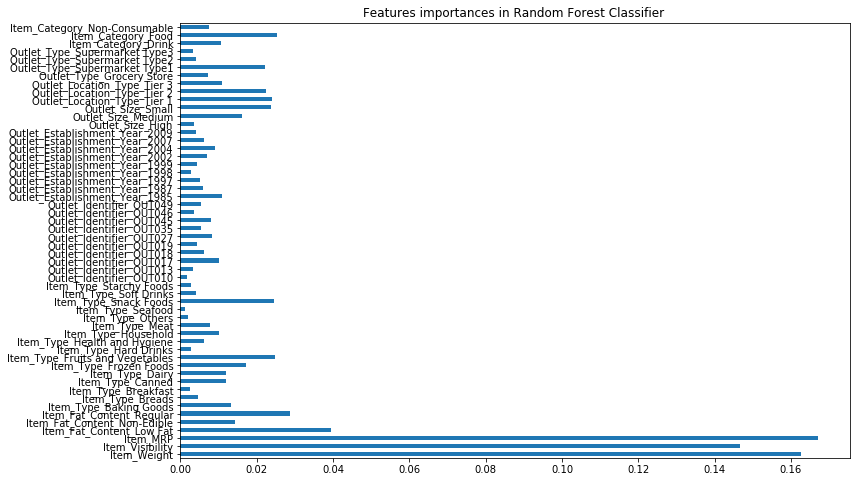

In [85]:
importances = pd.Series(model5.feature_importances_, index=X1.columns)
importances.plot(kind='barh', figsize=(12,8),title='Features importances in Random Forest Classifier ')

In [86]:
sorted_importances_model5 = pd.Series(model5.feature_importances_, index=X1.columns).sort_values(ascending=False)
print (sorted_importances_model5)

Item_MRP                           0.167097
Item_Weight                        0.162659
Item_Visibility                    0.146764
Item_Fat_Content_Low Fat           0.039563
Item_Fat_Content_Regular           0.028621
Item_Category_Food                 0.025220
Item_Type_Fruits and Vegetables    0.024834
Item_Type_Snack Foods              0.024539
Outlet_Location_Type_Tier 1        0.024145
Outlet_Size_Small                  0.023653
Outlet_Location_Type_Tier 2        0.022551
Outlet_Type_Supermarket Type1      0.022083
Item_Type_Frozen Foods             0.017305
Outlet_Size_Medium                 0.016260
Item_Fat_Content_Non-Edible        0.014315
Item_Type_Baking Goods             0.013207
Item_Type_Canned                   0.011907
Item_Type_Dairy                    0.011864
Outlet_Establishment_Year_1985     0.010942
Outlet_Location_Type_Tier 3        0.010881
Item_Category_Drink                0.010675
Item_Type_Household                0.010211
Outlet_Identifier_OUT017        

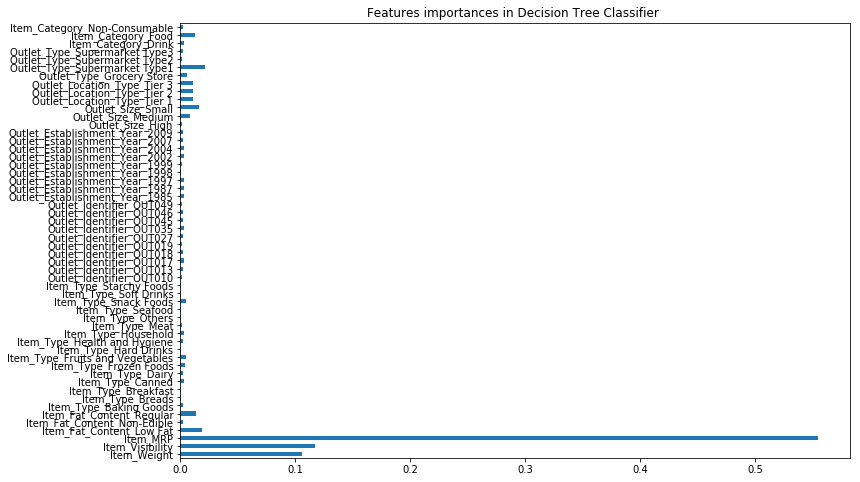

In [87]:
importances = pd.Series(model4.feature_importances_, index=X1.columns)
importances.plot(kind='barh', figsize=(12,8),title='Features importances in Decision Tree Classifier ')

In [88]:
sorted_importances_model4 = pd.Series(model4.feature_importances_, index=X1.columns).sort_values(ascending=False)
print (sorted_importances_model4)

Item_MRP                           0.554937
Item_Visibility                    0.117181
Item_Weight                        0.106246
Outlet_Type_Supermarket Type1      0.021293
Item_Fat_Content_Low Fat           0.018639
Outlet_Size_Small                  0.016137
Item_Fat_Content_Regular           0.013758
Item_Category_Food                 0.012762
Outlet_Location_Type_Tier 3        0.011360
Outlet_Location_Type_Tier 1        0.011060
Outlet_Location_Type_Tier 2        0.011056
Outlet_Size_Medium                 0.008763
Outlet_Type_Grocery Store          0.005580
Item_Type_Snack Foods              0.005067
Item_Type_Fruits and Vegetables    0.004616
Item_Type_Frozen Foods             0.003783
Outlet_Identifier_OUT035           0.003639
Outlet_Establishment_Year_1985     0.003637
Outlet_Establishment_Year_2004     0.003416
Outlet_Establishment_Year_2002     0.003005
Outlet_Identifier_OUT017           0.002985
Outlet_Establishment_Year_1997     0.002980
Item_Category_Drink             

In [89]:
#Optimizing RAM usage
del model5,pred_cv5,model4,pred_cv4,model3,pred_cv3,model2,pred_cv2,model1,pred_cv1

In [90]:
# creating XGBoost model
from xgboost.sklearn import XGBRegressor
model6 = XGBRegressor()
model6.fit(X_train1, y_train1)
pred_cv6 = model6.predict(X_test1)
rmse6 = sqrt(mean_squared_error(y_test1, pred_cv6)/10000000)
rmse6

3457.3722575714733

In [91]:
# SVM model
from sklearn.svm import SVR
model7 = SVR()
model7.fit(X_train1, y_train1)
pred_cv7 = model7.predict(X_test1)
rmse7 = sqrt(mean_squared_error(y_test1, pred_cv7)/10000000)
rmse7

5553.117050556382

In [92]:
# catboost model
from catboost import CatBoostRegressor
model8 = CatBoostRegressor(iterations=5,
                          learning_rate=0.95,
                          depth=5)
model8.fit(X_train1, y_train1)
pred_cv8 = model8.predict(X_test1)
rmse8 = sqrt(mean_squared_error(y_test1, pred_cv8)/10000000)
rmse8

0:	learn: 12427221.0282132	total: 64.8ms	remaining: 259ms
1:	learn: 11319976.7289397	total: 73.4ms	remaining: 110ms
2:	learn: 11124682.3480852	total: 89.5ms	remaining: 59.6ms
3:	learn: 10990640.3362103	total: 100ms	remaining: 25.1ms
4:	learn: 10786611.4546528	total: 110ms	remaining: 0us


3485.2336749724054

In [93]:
# lgb model
import lightgbm as lgb
d_train = lgb.Dataset(X_train1, label=y_train1)
params = {}
#params['learning_rate'] = 0.003
#params['boosting_type'] = 'gbdt'
#params['objective'] = 'binary'
#params['metric'] = 'binary_logloss'
#params['sub_feature'] = 0.5
#params['num_leaves'] = 10
#params['min_data'] = 50
#params['max_depth'] = 10
model9 = lgb.train(params, d_train, 100)
pred_cv9 = model9.predict(X_test1)
rmse9 = sqrt(mean_squared_error(y_test1, pred_cv9)/10000000)
rmse9

3523.2785097201686

In [94]:
sorted_importances_model_sum = (sorted_importances_model4 * sorted_importances_model5)/(sorted_importances_model4 + sorted_importances_model5)
sorted_importances_model_sum = pd.Series(sorted_importances_model_sum, index=X1.columns).sort_values(ascending=False)
print (sorted_importances_model_sum)

Item_MRP                           0.128426
Item_Visibility                    0.065157
Item_Weight                        0.064268
Item_Fat_Content_Low Fat           0.012670
Outlet_Type_Supermarket Type1      0.010840
Outlet_Size_Small                  0.009592
Item_Fat_Content_Regular           0.009291
Item_Category_Food                 0.008474
Outlet_Location_Type_Tier 1        0.007585
Outlet_Location_Type_Tier 2        0.007419
Outlet_Size_Medium                 0.005694
Outlet_Location_Type_Tier 3        0.005558
Item_Type_Snack Foods              0.004200
Item_Type_Fruits and Vegetables    0.003893
Outlet_Type_Grocery Store          0.003164
Item_Type_Frozen Foods             0.003104
Outlet_Establishment_Year_1985     0.002729
Outlet_Establishment_Year_2004     0.002481
Item_Type_Canned                   0.002309
Outlet_Identifier_OUT017           0.002305
Item_Category_Drink                0.002264
Item_Type_Baking Goods             0.002262
Item_Fat_Content_Non-Edible     

In [95]:
sorted_importances_model_sum.index

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Item_Fat_Content_Low Fat', 'Outlet_Type_Supermarket Type1',
       'Outlet_Size_Small', 'Item_Fat_Content_Regular', 'Item_Category_Food',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Size_Medium', 'Outlet_Location_Type_Tier 3',
       'Item_Type_Snack Foods', 'Item_Type_Fruits and Vegetables',
       'Outlet_Type_Grocery Store', 'Item_Type_Frozen Foods',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_2004',
       'Item_Type_Canned', 'Outlet_Identifier_OUT017', 'Item_Category_Drink',
       'Item_Type_Baking Goods', 'Item_Fat_Content_Non-Edible',
       'Item_Type_Dairy', 'Item_Type_Household', 'Outlet_Identifier_OUT035',
       'Outlet_Establishment_Year_2002', 'Outlet_Identifier_OUT027',
       'Item_Category_Non-Consumable', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Identifier_OUT045',
       'Outlet_Establishment_Year_2007

In [96]:
names=['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content_Low Fat',
       'Outlet_Type_Supermarket Type1', 'Item_Fat_Content_Regular',
       'Item_Category_Food', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 3', 'Outlet_Location_Type_Tier 1',
       'Item_Type_Snack Foods', 'Outlet_Size_Medium',
       'Outlet_Location_Type_Tier 2', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Frozen Foods',
       'Item_Type_Household']

In [97]:
X2=X1[names]
XZ2=XZ1[names]

In [98]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_transform, test_size = 0.2,random_state = 0)

In [99]:
#Logistic Regression model
from sklearn.linear_model import LinearRegression
model10 = LinearRegression()
model10.fit(X_train2, y_train2)
pred_cv10 = model10.predict(X_test2)
rmse10 = sqrt(mean_squared_error(y_test2, pred_cv10)/100000000)
rmse1-rmse10

-139.84381003065346

In [100]:
#K-NN model
model11 = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model11.fit(X_train2, y_train2)
pred_cv11 = model11.predict(X_test2)
rmse11 = sqrt(mean_squared_error(y_test2, pred_cv11)/10000000)
rmse2-rmse11

-663.0499431397529

In [101]:
#GaussianNB model
model12 = GaussianNB()
model12.fit(X_train2, y_train2)
pred_cv12 = model12.predict(X_test2)
rmse12 = sqrt(mean_squared_error(y_test2, pred_cv12)/10000000)
rmse3-rmse12

123.82472707531451

In [102]:
#DecisionTreeClassifier model
model13 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
model13.fit(X_train2, y_train2)
pred_cv13 = model13.predict(X_test2)
rmse13 = sqrt(mean_squared_error(y_test2, pred_cv13)/10000000)
rmse4-rmse13

-292.46289044190326

In [103]:
#RandomForestClassifier model
model14 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
model14.fit(X_train2, y_train2)
pred_cv14 = model14.predict(X_test2)
rmse14 = sqrt(mean_squared_error(y_test2, pred_cv14)/10000000)
rmse5-rmse14

-655.7935530741079

In [104]:
# creating XGBoost model
from xgboost.sklearn import XGBRegressor
model15 = XGBRegressor()
model15.fit(X_train2, y_train2)
pred_cv15 = model15.predict(X_test2)
rmse15 = sqrt(mean_squared_error(y_test2, pred_cv15)/10000000)
rmse6-rmse15

-273.9900992101316

In [105]:
# SVM model
from sklearn.svm import SVR
model16 = SVR()
model16.fit(X_train2, y_train2)
pred_cv16 = model16.predict(X_test2)
rmse16 = sqrt(mean_squared_error(y_test2, pred_cv16)/10000000)
rmse7-rmse16

-0.006285126590228174

In [106]:
# catboost model
from catboost import CatBoostRegressor
model17 = CatBoostRegressor(iterations=5,
                          learning_rate=0.95,
                          depth=5)
model17.fit(X_train2, y_train2)
pred_cv17 = model17.predict(X_test2)
rmse17 = sqrt(mean_squared_error(y_test2, pred_cv17)/10000000)
rmse8-rmse17

0:	learn: 12781479.6658893	total: 12.4ms	remaining: 49.6ms
1:	learn: 11895440.2939120	total: 25.2ms	remaining: 37.8ms
2:	learn: 11824413.2170093	total: 40.2ms	remaining: 26.8ms
3:	learn: 11701760.3924962	total: 49.8ms	remaining: 12.4ms
4:	learn: 11689035.9548213	total: 56.2ms	remaining: 0us


-277.6405372342556

In [107]:
# lgb model
import lightgbm as lgb
d_train = lgb.Dataset(X_train2, label=y_train2)
params = {}
#params['learning_rate'] = 0.003
#params['boosting_type'] = 'gbdt'
#params['objective'] = 'binary'
#params['metric'] = 'binary_logloss'
#params['sub_feature'] = 0.5
#params['num_leaves'] = 10
#params['min_data'] = 50
#params['max_depth'] = 10
model18 = lgb.train(params, d_train, 100)
pred_cv18 = model18.predict(X_test2)
rmse18 = sqrt(mean_squared_error(y_test2, pred_cv18)/10000000)
rmse9-rmse18

-383.0297514070289

In [108]:
rmse18

3906.3082611271975

In [109]:
#logistic regression

In [110]:
from sklearn.model_selection import cross_validate
for j in range(2,60):
    scores_c=0
    scories_end=[]
    scores=[]
    scores = cv_results = cross_validate(model10, X2, y_transform, cv=j,scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
    for i in range(len(scores['test_neg_mean_squared_error'])):
        scores_c= scores_c +sqrt(abs(scores['test_neg_mean_squared_error'][i-1])/10000000)
    resoult=scores_c/len(scores['test_neg_mean_squared_error'])
    scories_end.append(resoult)
    print('CV= ',j,' rmse= ',resoult)


CV=  2  rmse=  3992.3905269144125
CV=  3  rmse=  3989.735789005164
CV=  4  rmse=  3993.0556470714573
CV=  5  rmse=  3992.115844898807
CV=  6  rmse=  3990.078284563022
CV=  7  rmse=  3987.7175219338833
CV=  8  rmse=  3987.7930957824838
CV=  9  rmse=  3986.926982763436
CV=  10  rmse=  3988.9878842266867
CV=  11  rmse=  3986.680364490137
CV=  12  rmse=  3986.3665257758366
CV=  13  rmse=  3986.3360542375603
CV=  14  rmse=  3986.5676493888727
CV=  15  rmse=  3985.943924798285
CV=  16  rmse=  3985.0341399201375
CV=  17  rmse=  3984.9444378952894
CV=  18  rmse=  3984.7181795425568
CV=  19  rmse=  3983.300282239201
CV=  20  rmse=  3984.4252785567433
CV=  21  rmse=  3983.3312051878906
CV=  22  rmse=  3983.5697513247824
CV=  23  rmse=  3982.9404417733294
CV=  24  rmse=  3984.13017781209
CV=  25  rmse=  3982.9330564101256
CV=  26  rmse=  3983.7474985757017
CV=  27  rmse=  3981.752175122051
CV=  28  rmse=  3980.869304483668
CV=  29  rmse=  3980.9149548958726
CV=  30  rmse=  3980.879973874077
CV=  

In [111]:
del model6,pred_cv6,model7,pred_cv7,model8,pred_cv8,model9,pred_cv9,model10,pred_cv10
del model11,pred_cv11,model12,pred_cv12,model13,pred_cv13,model14,pred_cv14
del model15,pred_cv15,model16,pred_cv16,model17,pred_cv17,model18,pred_cv18

In [112]:
del X_train2, X_test2, y_train2, y_test2, X2

In [113]:
def plot_history(a_test, a_train):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.plot(a_test)
  plt.plot(a_train)
  plt.ylim([0,100])
  plt.legend()
  plt.show()

In [114]:
total_length=len(X1_nn)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X1_nn[:train_length]
X_test=X1_nn[train_length:]
y_train=y_nn[:train_length]
y_test=y_nn[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 6818 y: 6818
Length of test set x: 1705 y: 1705


In [115]:
y_train=y_train.values
y_test=y_test.values

In [116]:
X_train

array([[0.00736044, 0.00207233, 0.01755574, ..., 0.        , 0.01277753,
        0.        ],
       [0.00468536, 0.00248957, 0.0033922 , ..., 0.03537746, 0.        ,
        0.        ],
       [0.0138503 , 0.00216438, 0.00995243, ..., 0.        , 0.01277753,
        0.        ],
       ...,
       [0.01294013, 0.00421916, 0.01162967, ..., 0.        , 0.01277753,
        0.        ],
       [0.01119895, 0.01231704, 0.01198291, ..., 0.03537746, 0.        ,
        0.        ],
       [0.00957649, 0.        , 0.01020026, ..., 0.03537746, 0.        ,
        0.        ]])

In [117]:
y_train

array([0.28358666, 0.03141895, 0.15811486, ..., 0.1117515 , 0.18096501,
       0.2531878 ])

In [118]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
a_test, a_train = [], []

# create model
optimizer =keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model = Sequential()
model.add(Dense(10,activation='relu', input_dim=54))
model.add(Dense(5,activation='relu',
                kernel_initializer='random_uniform',
                bias_initializer='zeros'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='Adam', metrics=['mse'])
# train model
training_epochs=1200
history=[]
for epoch in range(training_epochs):
    model.fit(X_train,y_train, verbose=3)
    prediction_train=model.predict(X_train)
    mse1 = mean_squared_error(prediction_train, y_train)
    prediction_test=model.predict(X_test)
    mse2 = mean_squared_error(prediction_test, y_test)
    
    a_train.append(mse1)
    a_test.append(mse2)
    
    print('Epoch:',epoch,'/',training_epochs,"mse_train=", "{:.5f}".format(mse1),"mse_test=", "{:.5f}".format(mse2))


Epoch 1/1
Epoch: 0 / 1200 mse_train= 0.01549 mse_test= 0.01603
Epoch 1/1
Epoch: 1 / 1200 mse_train= 0.01234 mse_test= 0.01263
Epoch 1/1
Epoch: 2 / 1200 mse_train= 0.01151 mse_test= 0.01177
Epoch 1/1
Epoch: 3 / 1200 mse_train= 0.01073 mse_test= 0.01094
Epoch 1/1
Epoch: 4 / 1200 mse_train= 0.00973 mse_test= 0.00996
Epoch 1/1
Epoch: 5 / 1200 mse_train= 0.00860 mse_test= 0.00878
Epoch 1/1
Epoch: 6 / 1200 mse_train= 0.00770 mse_test= 0.00785
Epoch 1/1
Epoch: 7 / 1200 mse_train= 0.00727 mse_test= 0.00748
Epoch 1/1
Epoch: 8 / 1200 mse_train= 0.00703 mse_test= 0.00718
Epoch 1/1
Epoch: 9 / 1200 mse_train= 0.00695 mse_test= 0.00714
Epoch 1/1
Epoch: 10 / 1200 mse_train= 0.00691 mse_test= 0.00716
Epoch 1/1
Epoch: 11 / 1200 mse_train= 0.00691 mse_test= 0.00716
Epoch 1/1
Epoch: 12 / 1200 mse_train= 0.00698 mse_test= 0.00727
Epoch 1/1
Epoch: 13 / 1200 mse_train= 0.00693 mse_test= 0.00719
Epoch 1/1
Epoch: 14 / 1200 mse_train= 0.00689 mse_test= 0.00710
Epoch 1/1
Epoch: 15 / 1200 mse_train= 0.00693 mse_

Epoch: 128 / 1200 mse_train= 0.00662 mse_test= 0.00700
Epoch 1/1
Epoch: 129 / 1200 mse_train= 0.00671 mse_test= 0.00712
Epoch 1/1
Epoch: 130 / 1200 mse_train= 0.00680 mse_test= 0.00713
Epoch 1/1
Epoch: 131 / 1200 mse_train= 0.00678 mse_test= 0.00710
Epoch 1/1
Epoch: 132 / 1200 mse_train= 0.00679 mse_test= 0.00711
Epoch 1/1
Epoch: 133 / 1200 mse_train= 0.00666 mse_test= 0.00709
Epoch 1/1
Epoch: 134 / 1200 mse_train= 0.00661 mse_test= 0.00699
Epoch 1/1
Epoch: 135 / 1200 mse_train= 0.00660 mse_test= 0.00700
Epoch 1/1
Epoch: 136 / 1200 mse_train= 0.00723 mse_test= 0.00745
Epoch 1/1
Epoch: 137 / 1200 mse_train= 0.00659 mse_test= 0.00697
Epoch 1/1
Epoch: 138 / 1200 mse_train= 0.00670 mse_test= 0.00711
Epoch 1/1
Epoch: 139 / 1200 mse_train= 0.00659 mse_test= 0.00697
Epoch 1/1
Epoch: 140 / 1200 mse_train= 0.00677 mse_test= 0.00710
Epoch 1/1
Epoch: 141 / 1200 mse_train= 0.00684 mse_test= 0.00718
Epoch 1/1
Epoch: 142 / 1200 mse_train= 0.00659 mse_test= 0.00700
Epoch 1/1
Epoch: 143 / 1200 mse_tra

Epoch: 255 / 1200 mse_train= 0.00665 mse_test= 0.00714
Epoch 1/1
Epoch: 256 / 1200 mse_train= 0.00654 mse_test= 0.00701
Epoch 1/1
Epoch: 257 / 1200 mse_train= 0.00652 mse_test= 0.00697
Epoch 1/1
Epoch: 258 / 1200 mse_train= 0.00656 mse_test= 0.00702
Epoch 1/1
Epoch: 259 / 1200 mse_train= 0.00654 mse_test= 0.00699
Epoch 1/1
Epoch: 260 / 1200 mse_train= 0.00653 mse_test= 0.00700
Epoch 1/1
Epoch: 261 / 1200 mse_train= 0.00653 mse_test= 0.00704
Epoch 1/1
Epoch: 262 / 1200 mse_train= 0.00656 mse_test= 0.00700
Epoch 1/1
Epoch: 263 / 1200 mse_train= 0.00656 mse_test= 0.00704
Epoch 1/1
Epoch: 264 / 1200 mse_train= 0.00665 mse_test= 0.00717
Epoch 1/1
Epoch: 265 / 1200 mse_train= 0.00666 mse_test= 0.00707
Epoch 1/1
Epoch: 266 / 1200 mse_train= 0.00666 mse_test= 0.00710
Epoch 1/1
Epoch: 267 / 1200 mse_train= 0.00657 mse_test= 0.00699
Epoch 1/1
Epoch: 268 / 1200 mse_train= 0.00653 mse_test= 0.00696
Epoch 1/1
Epoch: 269 / 1200 mse_train= 0.00657 mse_test= 0.00703
Epoch 1/1
Epoch: 270 / 1200 mse_tra

Epoch: 382 / 1200 mse_train= 0.00651 mse_test= 0.00710
Epoch 1/1
Epoch: 383 / 1200 mse_train= 0.00663 mse_test= 0.00710
Epoch 1/1
Epoch: 384 / 1200 mse_train= 0.00647 mse_test= 0.00699
Epoch 1/1
Epoch: 385 / 1200 mse_train= 0.00659 mse_test= 0.00706
Epoch 1/1
Epoch: 386 / 1200 mse_train= 0.00650 mse_test= 0.00698
Epoch 1/1
Epoch: 387 / 1200 mse_train= 0.00653 mse_test= 0.00706
Epoch 1/1
Epoch: 388 / 1200 mse_train= 0.00675 mse_test= 0.00723
Epoch 1/1
Epoch: 389 / 1200 mse_train= 0.00679 mse_test= 0.00724
Epoch 1/1
Epoch: 390 / 1200 mse_train= 0.00656 mse_test= 0.00706
Epoch 1/1
Epoch: 391 / 1200 mse_train= 0.00668 mse_test= 0.00722
Epoch 1/1
Epoch: 392 / 1200 mse_train= 0.00649 mse_test= 0.00704
Epoch 1/1
Epoch: 393 / 1200 mse_train= 0.00649 mse_test= 0.00701
Epoch 1/1
Epoch: 394 / 1200 mse_train= 0.00647 mse_test= 0.00701
Epoch 1/1
Epoch: 395 / 1200 mse_train= 0.00650 mse_test= 0.00699
Epoch 1/1
Epoch: 396 / 1200 mse_train= 0.00648 mse_test= 0.00702
Epoch 1/1
Epoch: 397 / 1200 mse_tra

Epoch: 509 / 1200 mse_train= 0.00646 mse_test= 0.00703
Epoch 1/1
Epoch: 510 / 1200 mse_train= 0.00648 mse_test= 0.00716
Epoch 1/1
Epoch: 511 / 1200 mse_train= 0.00657 mse_test= 0.00725
Epoch 1/1
Epoch: 512 / 1200 mse_train= 0.00649 mse_test= 0.00712
Epoch 1/1
Epoch: 513 / 1200 mse_train= 0.00665 mse_test= 0.00724
Epoch 1/1
Epoch: 514 / 1200 mse_train= 0.00667 mse_test= 0.00729
Epoch 1/1
Epoch: 515 / 1200 mse_train= 0.00651 mse_test= 0.00720
Epoch 1/1
Epoch: 516 / 1200 mse_train= 0.00641 mse_test= 0.00704
Epoch 1/1
Epoch: 517 / 1200 mse_train= 0.00645 mse_test= 0.00706
Epoch 1/1
Epoch: 518 / 1200 mse_train= 0.00642 mse_test= 0.00704
Epoch 1/1
Epoch: 519 / 1200 mse_train= 0.00654 mse_test= 0.00719
Epoch 1/1
Epoch: 520 / 1200 mse_train= 0.00650 mse_test= 0.00711
Epoch 1/1
Epoch: 521 / 1200 mse_train= 0.00643 mse_test= 0.00705
Epoch 1/1
Epoch: 522 / 1200 mse_train= 0.00640 mse_test= 0.00702
Epoch 1/1
Epoch: 523 / 1200 mse_train= 0.00640 mse_test= 0.00705
Epoch 1/1
Epoch: 524 / 1200 mse_tra

Epoch: 636 / 1200 mse_train= 0.00651 mse_test= 0.00722
Epoch 1/1
Epoch: 637 / 1200 mse_train= 0.00644 mse_test= 0.00720
Epoch 1/1
Epoch: 638 / 1200 mse_train= 0.00641 mse_test= 0.00721
Epoch 1/1
Epoch: 639 / 1200 mse_train= 0.00638 mse_test= 0.00716
Epoch 1/1
Epoch: 640 / 1200 mse_train= 0.00639 mse_test= 0.00713
Epoch 1/1
Epoch: 641 / 1200 mse_train= 0.00638 mse_test= 0.00710
Epoch 1/1
Epoch: 642 / 1200 mse_train= 0.00637 mse_test= 0.00710
Epoch 1/1
Epoch: 643 / 1200 mse_train= 0.00641 mse_test= 0.00710
Epoch 1/1
Epoch: 644 / 1200 mse_train= 0.00636 mse_test= 0.00706
Epoch 1/1
Epoch: 645 / 1200 mse_train= 0.00640 mse_test= 0.00717
Epoch 1/1
Epoch: 646 / 1200 mse_train= 0.00637 mse_test= 0.00704
Epoch 1/1
Epoch: 647 / 1200 mse_train= 0.00639 mse_test= 0.00714
Epoch 1/1
Epoch: 648 / 1200 mse_train= 0.00640 mse_test= 0.00710
Epoch 1/1
Epoch: 649 / 1200 mse_train= 0.00639 mse_test= 0.00711
Epoch 1/1
Epoch: 650 / 1200 mse_train= 0.00641 mse_test= 0.00716
Epoch 1/1
Epoch: 651 / 1200 mse_tra

Epoch: 763 / 1200 mse_train= 0.00635 mse_test= 0.00709
Epoch 1/1
Epoch: 764 / 1200 mse_train= 0.00635 mse_test= 0.00709
Epoch 1/1
Epoch: 765 / 1200 mse_train= 0.00664 mse_test= 0.00746
Epoch 1/1
Epoch: 766 / 1200 mse_train= 0.00634 mse_test= 0.00712
Epoch 1/1
Epoch: 767 / 1200 mse_train= 0.00640 mse_test= 0.00718
Epoch 1/1
Epoch: 768 / 1200 mse_train= 0.00649 mse_test= 0.00727
Epoch 1/1
Epoch: 769 / 1200 mse_train= 0.00633 mse_test= 0.00716
Epoch 1/1
Epoch: 770 / 1200 mse_train= 0.00635 mse_test= 0.00712
Epoch 1/1
Epoch: 771 / 1200 mse_train= 0.00641 mse_test= 0.00721
Epoch 1/1
Epoch: 772 / 1200 mse_train= 0.00641 mse_test= 0.00724
Epoch 1/1
Epoch: 773 / 1200 mse_train= 0.00636 mse_test= 0.00714
Epoch 1/1
Epoch: 774 / 1200 mse_train= 0.00635 mse_test= 0.00717
Epoch 1/1
Epoch: 775 / 1200 mse_train= 0.00640 mse_test= 0.00719
Epoch 1/1
Epoch: 776 / 1200 mse_train= 0.00646 mse_test= 0.00728
Epoch 1/1
Epoch: 777 / 1200 mse_train= 0.00642 mse_test= 0.00715
Epoch 1/1
Epoch: 778 / 1200 mse_tra

Epoch: 890 / 1200 mse_train= 0.00644 mse_test= 0.00716
Epoch 1/1
Epoch: 891 / 1200 mse_train= 0.00634 mse_test= 0.00717
Epoch 1/1
Epoch: 892 / 1200 mse_train= 0.00636 mse_test= 0.00721
Epoch 1/1
Epoch: 893 / 1200 mse_train= 0.00633 mse_test= 0.00718
Epoch 1/1
Epoch: 894 / 1200 mse_train= 0.00637 mse_test= 0.00717
Epoch 1/1
Epoch: 895 / 1200 mse_train= 0.00663 mse_test= 0.00741
Epoch 1/1
Epoch: 896 / 1200 mse_train= 0.00645 mse_test= 0.00729
Epoch 1/1
Epoch: 897 / 1200 mse_train= 0.00652 mse_test= 0.00735
Epoch 1/1
Epoch: 898 / 1200 mse_train= 0.00637 mse_test= 0.00722
Epoch 1/1
Epoch: 899 / 1200 mse_train= 0.00636 mse_test= 0.00712
Epoch 1/1
Epoch: 900 / 1200 mse_train= 0.00635 mse_test= 0.00716
Epoch 1/1
Epoch: 901 / 1200 mse_train= 0.00640 mse_test= 0.00715
Epoch 1/1
Epoch: 902 / 1200 mse_train= 0.00633 mse_test= 0.00716
Epoch 1/1
Epoch: 903 / 1200 mse_train= 0.00638 mse_test= 0.00714
Epoch 1/1
Epoch: 904 / 1200 mse_train= 0.00650 mse_test= 0.00725
Epoch 1/1
Epoch: 905 / 1200 mse_tra

Epoch: 1016 / 1200 mse_train= 0.00637 mse_test= 0.00718
Epoch 1/1
Epoch: 1017 / 1200 mse_train= 0.00631 mse_test= 0.00721
Epoch 1/1
Epoch: 1018 / 1200 mse_train= 0.00632 mse_test= 0.00721
Epoch 1/1
Epoch: 1019 / 1200 mse_train= 0.00644 mse_test= 0.00721
Epoch 1/1
Epoch: 1020 / 1200 mse_train= 0.00630 mse_test= 0.00718
Epoch 1/1
Epoch: 1021 / 1200 mse_train= 0.00631 mse_test= 0.00720
Epoch 1/1
Epoch: 1022 / 1200 mse_train= 0.00639 mse_test= 0.00722
Epoch 1/1
Epoch: 1023 / 1200 mse_train= 0.00633 mse_test= 0.00718
Epoch 1/1
Epoch: 1024 / 1200 mse_train= 0.00632 mse_test= 0.00717
Epoch 1/1
Epoch: 1025 / 1200 mse_train= 0.00682 mse_test= 0.00773
Epoch 1/1
Epoch: 1026 / 1200 mse_train= 0.00634 mse_test= 0.00723
Epoch 1/1
Epoch: 1027 / 1200 mse_train= 0.00643 mse_test= 0.00724
Epoch 1/1
Epoch: 1028 / 1200 mse_train= 0.00634 mse_test= 0.00714
Epoch 1/1
Epoch: 1029 / 1200 mse_train= 0.00636 mse_test= 0.00718
Epoch 1/1
Epoch: 1030 / 1200 mse_train= 0.00633 mse_test= 0.00721
Epoch 1/1
Epoch: 103

Epoch: 1141 / 1200 mse_train= 0.00631 mse_test= 0.00722
Epoch 1/1
Epoch: 1142 / 1200 mse_train= 0.00631 mse_test= 0.00722
Epoch 1/1
Epoch: 1143 / 1200 mse_train= 0.00629 mse_test= 0.00719
Epoch 1/1
Epoch: 1144 / 1200 mse_train= 0.00637 mse_test= 0.00727
Epoch 1/1
Epoch: 1145 / 1200 mse_train= 0.00632 mse_test= 0.00720
Epoch 1/1
Epoch: 1146 / 1200 mse_train= 0.00645 mse_test= 0.00742
Epoch 1/1
Epoch: 1147 / 1200 mse_train= 0.00640 mse_test= 0.00725
Epoch 1/1
Epoch: 1148 / 1200 mse_train= 0.00635 mse_test= 0.00724
Epoch 1/1
Epoch: 1149 / 1200 mse_train= 0.00651 mse_test= 0.00734
Epoch 1/1
Epoch: 1150 / 1200 mse_train= 0.00633 mse_test= 0.00718
Epoch 1/1
Epoch: 1151 / 1200 mse_train= 0.00636 mse_test= 0.00732
Epoch 1/1
Epoch: 1152 / 1200 mse_train= 0.00632 mse_test= 0.00727
Epoch 1/1
Epoch: 1153 / 1200 mse_train= 0.00633 mse_test= 0.00717
Epoch 1/1
Epoch: 1154 / 1200 mse_train= 0.00631 mse_test= 0.00725
Epoch 1/1
Epoch: 1155 / 1200 mse_train= 0.00629 mse_test= 0.00722
Epoch 1/1
Epoch: 115

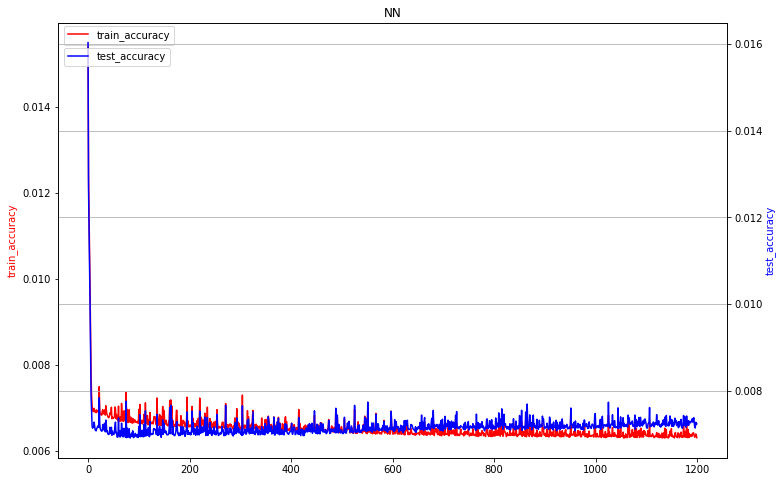

In [119]:
fig, ax1 = plt.subplots(figsize=(12,8))
plt.title('NN')
plt.plot(a_train, color='r')
ax1.set_ylabel('train_accuracy',color='r')
plt.legend(['train_accuracy'],loc=(0.01,0.95))
ax2 = ax1.twinx()
plt.plot(a_test,color='b')
ax2.set_ylabel('test_accuracy',color='b')
plt.legend(['test_accuracy'],loc=(0.01,0.90))
plt.grid(True)

In [120]:
#The boundary between overfitting and underfitting is approximately 500 epoch

In [121]:
del a_train, a_test

In [123]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
a_test, a_train = [], []

# create model
optimizer =keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model = Sequential()
model.add(Dense(10,activation='relu', input_dim=54))
model.add(Dense(5,activation='relu',
                kernel_initializer='random_uniform',
                bias_initializer='zeros'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='Adam', metrics=['mse'])
# train model
training_epochs=500
history=[]
for epoch in range(training_epochs):
    model.fit(X_train,y_train, verbose=3)
    prediction_train=model.predict(X_train)
    mse1 = mean_squared_error(prediction_train, y_train)
    prediction_test=model.predict(X_test)
    mse2 = mean_squared_error(prediction_test, y_test)
    
    a_train.append(mse1)
    a_test.append(mse2)
    
    print('Epoch:',epoch,'/',training_epochs,"mse_train=", "{:.5f}".format(mse1),"mse_test=", "{:.5f}".format(mse2))

Epoch 1/1
Epoch: 0 / 500 mse_train= 0.01470 mse_test= 0.01527
Epoch 1/1
Epoch: 1 / 500 mse_train= 0.01240 mse_test= 0.01270
Epoch 1/1
Epoch: 2 / 500 mse_train= 0.01154 mse_test= 0.01177
Epoch 1/1
Epoch: 3 / 500 mse_train= 0.01098 mse_test= 0.01120
Epoch 1/1
Epoch: 4 / 500 mse_train= 0.01031 mse_test= 0.01044
Epoch 1/1
Epoch: 5 / 500 mse_train= 0.00970 mse_test= 0.00993
Epoch 1/1
Epoch: 6 / 500 mse_train= 0.00855 mse_test= 0.00873
Epoch 1/1
Epoch: 7 / 500 mse_train= 0.00779 mse_test= 0.00794
Epoch 1/1
Epoch: 8 / 500 mse_train= 0.00740 mse_test= 0.00760
Epoch 1/1
Epoch: 9 / 500 mse_train= 0.00715 mse_test= 0.00739
Epoch 1/1
Epoch: 10 / 500 mse_train= 0.00709 mse_test= 0.00730
Epoch 1/1
Epoch: 11 / 500 mse_train= 0.00693 mse_test= 0.00708
Epoch 1/1
Epoch: 12 / 500 mse_train= 0.00716 mse_test= 0.00729
Epoch 1/1
Epoch: 13 / 500 mse_train= 0.00693 mse_test= 0.00716
Epoch 1/1
Epoch: 14 / 500 mse_train= 0.00723 mse_test= 0.00738
Epoch 1/1
Epoch: 15 / 500 mse_train= 0.00689 mse_test= 0.00707
Ep

Epoch: 130 / 500 mse_train= 0.00664 mse_test= 0.00699
Epoch 1/1
Epoch: 131 / 500 mse_train= 0.00666 mse_test= 0.00699
Epoch 1/1
Epoch: 132 / 500 mse_train= 0.00664 mse_test= 0.00696
Epoch 1/1
Epoch: 133 / 500 mse_train= 0.00670 mse_test= 0.00706
Epoch 1/1
Epoch: 134 / 500 mse_train= 0.00663 mse_test= 0.00697
Epoch 1/1
Epoch: 135 / 500 mse_train= 0.00720 mse_test= 0.00747
Epoch 1/1
Epoch: 136 / 500 mse_train= 0.00669 mse_test= 0.00705
Epoch 1/1
Epoch: 137 / 500 mse_train= 0.00669 mse_test= 0.00703
Epoch 1/1
Epoch: 138 / 500 mse_train= 0.00665 mse_test= 0.00696
Epoch 1/1
Epoch: 139 / 500 mse_train= 0.00668 mse_test= 0.00698
Epoch 1/1
Epoch: 140 / 500 mse_train= 0.00665 mse_test= 0.00702
Epoch 1/1
Epoch: 141 / 500 mse_train= 0.00664 mse_test= 0.00700
Epoch 1/1
Epoch: 142 / 500 mse_train= 0.00665 mse_test= 0.00698
Epoch 1/1
Epoch: 143 / 500 mse_train= 0.00665 mse_test= 0.00701
Epoch 1/1
Epoch: 144 / 500 mse_train= 0.00667 mse_test= 0.00700
Epoch 1/1
Epoch: 145 / 500 mse_train= 0.00664 mse_

Epoch: 259 / 500 mse_train= 0.00657 mse_test= 0.00699
Epoch 1/1
Epoch: 260 / 500 mse_train= 0.00666 mse_test= 0.00714
Epoch 1/1
Epoch: 261 / 500 mse_train= 0.00693 mse_test= 0.00744
Epoch 1/1
Epoch: 262 / 500 mse_train= 0.00655 mse_test= 0.00695
Epoch 1/1
Epoch: 263 / 500 mse_train= 0.00677 mse_test= 0.00714
Epoch 1/1
Epoch: 264 / 500 mse_train= 0.00738 mse_test= 0.00766
Epoch 1/1
Epoch: 265 / 500 mse_train= 0.00689 mse_test= 0.00735
Epoch 1/1
Epoch: 266 / 500 mse_train= 0.00658 mse_test= 0.00702
Epoch 1/1
Epoch: 267 / 500 mse_train= 0.00655 mse_test= 0.00702
Epoch 1/1
Epoch: 268 / 500 mse_train= 0.00660 mse_test= 0.00706
Epoch 1/1
Epoch: 269 / 500 mse_train= 0.00669 mse_test= 0.00717
Epoch 1/1
Epoch: 270 / 500 mse_train= 0.00662 mse_test= 0.00705
Epoch 1/1
Epoch: 271 / 500 mse_train= 0.00655 mse_test= 0.00700
Epoch 1/1
Epoch: 272 / 500 mse_train= 0.00665 mse_test= 0.00704
Epoch 1/1
Epoch: 273 / 500 mse_train= 0.00657 mse_test= 0.00704
Epoch 1/1
Epoch: 274 / 500 mse_train= 0.00658 mse_

Epoch: 388 / 500 mse_train= 0.00655 mse_test= 0.00703
Epoch 1/1
Epoch: 389 / 500 mse_train= 0.00653 mse_test= 0.00704
Epoch 1/1
Epoch: 390 / 500 mse_train= 0.00651 mse_test= 0.00701
Epoch 1/1
Epoch: 391 / 500 mse_train= 0.00653 mse_test= 0.00704
Epoch 1/1
Epoch: 392 / 500 mse_train= 0.00649 mse_test= 0.00702
Epoch 1/1
Epoch: 393 / 500 mse_train= 0.00654 mse_test= 0.00711
Epoch 1/1
Epoch: 394 / 500 mse_train= 0.00652 mse_test= 0.00703
Epoch 1/1
Epoch: 395 / 500 mse_train= 0.00650 mse_test= 0.00701
Epoch 1/1
Epoch: 396 / 500 mse_train= 0.00649 mse_test= 0.00699
Epoch 1/1
Epoch: 397 / 500 mse_train= 0.00672 mse_test= 0.00718
Epoch 1/1
Epoch: 398 / 500 mse_train= 0.00653 mse_test= 0.00709
Epoch 1/1
Epoch: 399 / 500 mse_train= 0.00651 mse_test= 0.00702
Epoch 1/1
Epoch: 400 / 500 mse_train= 0.00652 mse_test= 0.00703
Epoch 1/1
Epoch: 401 / 500 mse_train= 0.00657 mse_test= 0.00712
Epoch 1/1
Epoch: 402 / 500 mse_train= 0.00658 mse_test= 0.00706
Epoch 1/1
Epoch: 403 / 500 mse_train= 0.00649 mse_

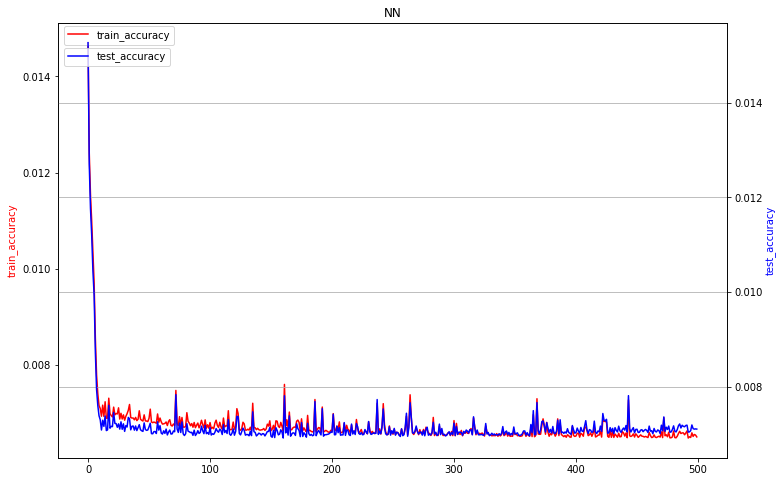

In [124]:
fig, ax1 = plt.subplots(figsize=(12,8))
plt.title('NN')
plt.plot(a_train, color='r')
ax1.set_ylabel('train_accuracy',color='r')
plt.legend(['train_accuracy'],loc=(0.01,0.95))
ax2 = ax1.twinx()
plt.plot(a_test,color='b')
ax2.set_ylabel('test_accuracy',color='b')
plt.legend(['test_accuracy'],loc=(0.01,0.90))
plt.grid(True)

In [125]:
print(a_train.index(min(a_train)))

492


In [126]:
min_train=a_train[a_train.index(min(a_train))]
min_test=a_test[a_train.index(min(a_train))]
print("min_mse_train=", "{:.5f}".format(min_train),"min_mse_test=", "{:.5f}".format(min_test))

min_mse_train= 0.00648 min_mse_test= 0.00704


In [127]:
#The smallest MSE error is come from NN and is equal 0.00704  for test data